# Escuela Politécnica Nacional
## Facultad de Ingeniería en Sistemas
## Materia: Métodos Numéricos
## Nombre: Daniel Ismael Flores Espín

Determine el orden de la mejor aproximación para las siguientes funciones, usando la Serie y el Polinomio de Lagrange:

1. $\frac{1}{25x^{2}+1}$, $x_0 = 0$

Con Taylor:

Fórmulas y Valores Simplificados de las Aproximaciones de Taylor
Error evaluando el polinomio de Taylor de orden 1
Error evaluando el polinomio de Taylor de orden 2
Orden 3:
  Fórmula: 1 - 25*x**2
Orden 4:
  Fórmula: 1 - 25*x**2
Orden 5:
  Fórmula: 625*x**4 - 25*x**2 + 1
Orden 6:
  Fórmula: 625*x**4 - 25*x**2 + 1
Orden 7:
  Fórmula: -15625*x**6 + 625*x**4 - 25*x**2 + 1
Orden 8:
  Fórmula: -15625*x**6 + 625*x**4 - 25*x**2 + 1
Orden 9:
  Fórmula: 390625*x**8 - 15625*x**6 + 625*x**4 - 25*x**2 + 1


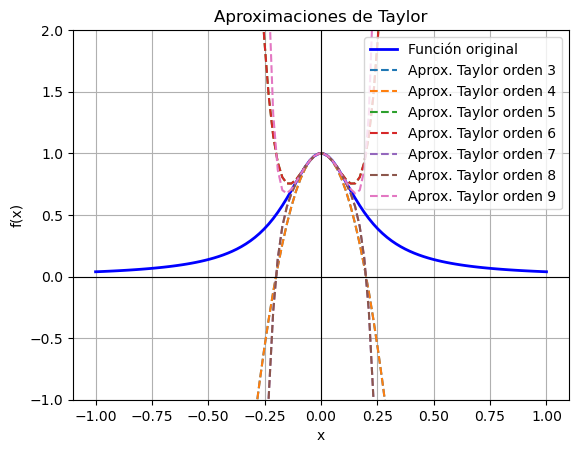

In [39]:
import numpy as np
import math
import sympy as sp
import matplotlib.pyplot as plt

x = sp.Symbol('x')
f = 1 / (25 * (x**2) + 1)

def rec_derivada(f, n):
    if n == 0:
        return f
    else:
        return sp.diff(rec_derivada(f, n - 1), x)

def taylor_series(f, x, n_terms, x0=0):
    taylor_exp = 0
    for n in range(n_terms):
        deriv = rec_derivada(f, n)
        deriv_x0 = deriv.subs(x, x0)
        taylor_exp += (deriv_x0 / math.factorial(n)) * (x - x0)**n
    return taylor_exp

x_vals = np.linspace(-1, 1, 100)
f_lambdified = sp.lambdify(x, f, 'numpy')
y_vals = f_lambdified(x_vals)

plt.plot(x_vals, y_vals, label="Función original", color="blue", linewidth=2)

print("Fórmulas y Valores Simplificados de las Aproximaciones de Taylor")
for n in range(1, 10):
    taylor_exp = taylor_series(f, x, n)
    taylor_lambdified = sp.lambdify(x, taylor_exp, 'numpy')

    try:
        y_taylor_vals = taylor_lambdified(x_vals)
        if len(y_taylor_vals) == len(x_vals):
            plt.plot(x_vals, y_taylor_vals, linestyle="--", label=f"Aprox. Taylor orden {n}")
    except Exception as e:
        print(f"Error evaluando el polinomio de Taylor de orden {n}")
        continue
        
    print(f"Orden {n}:")
    print(f"  Fórmula: {sp.simplify(taylor_exp)}")

plt.title("Aproximaciones de Taylor")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.legend()
plt.grid(True)
plt.ylim(-1, 2)
plt.show()

Polinomio de Lagrange:

Polinomio de Lagrange: 1.0 - 16.0*x**2


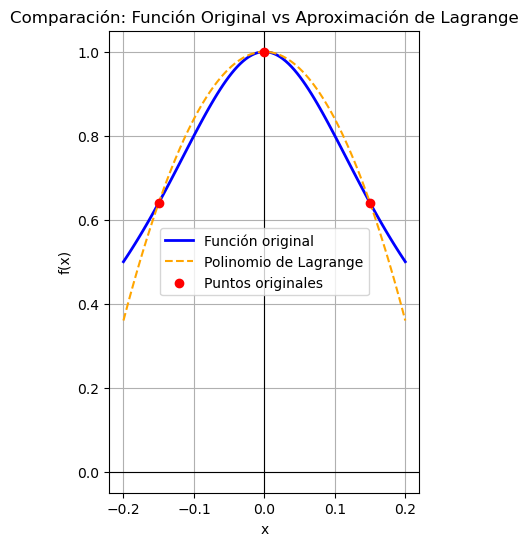

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def lagrange_polynomial(x_points, y_points):
    x = sp.Symbol('x')
    n = len(x_points)
    P = 0
    for k in range(n):
        Lk = 1
        for i in range(n):
            if i != k:
                Lk *= (x - x_points[i]) / (x_points[k] - x_points[i])
        P += y_points[k] * Lk
    return sp.simplify(P)

x_points = [-0.15, 0, 0.15]
y_points = [
    (1 / (25 * ((-0.15)**2) + 1)),
    (1 / (25 * ((0)**2) + 1)),
    (1 / (25 * (0.15**2) + 1))
]

P = lagrange_polynomial(x_points, y_points)
print(f"Polinomio de Lagrange: {P}")

P_lambdified = sp.lambdify(sp.Symbol('x'), P, 'numpy')

x_vals = np.linspace(-0.2, 0.2, 100)
y_original = 1 / (25 * (x_vals**2) + 1)
y_lagrange = P_lambdified(x_vals)

plt.figure(figsize=(4, 6))
plt.plot(x_vals, y_original, label="Función original", color="blue", linewidth=2)
plt.plot(x_vals, y_lagrange, label="Polinomio de Lagrange", color="orange", linestyle="--")
plt.scatter(x_points, y_points, color="red", label="Puntos originales", zorder=5)
plt.title("Comparación: Función Original vs Aproximación de Lagrange")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.legend()
plt.grid()
plt.show()

1. $arctan(x)$, $x_0 = 1$

Con Taylor:

Fórmulas y Valores Simplificados de las Aproximaciones de Taylor
Error evaluando el polinomio de Taylor de orden 1
Orden 2:
  Fórmula: x/2 - 1/2 + pi/4
Orden 3:
  Fórmula: -x**2/4 + x - 3/4 + pi/4
Orden 4:
  Fórmula: x**3/12 - x**2/2 + 5*x/4 - 5/6 + pi/4
Orden 5:
  Fórmula: x**3/12 - x**2/2 + 5*x/4 - 5/6 + pi/4
Orden 6:
  Fórmula: x/2 - (x - 1)**5/40 + (x - 1)**3/12 - (x - 1)**2/4 - 1/2 + pi/4
Orden 7:
  Fórmula: x**6/48 - 3*x**5/20 + 7*x**4/16 - 7*x**3/12 + x**2/16 + x - 63/80 + pi/4
Orden 8:
  Fórmula: -x**7/112 + x**6/12 - 27*x**5/80 + 3*x**4/4 - 43*x**3/48 + x**2/4 + 15*x/16 - 109/140 + pi/4
Orden 9:
  Fórmula: -x**7/112 + x**6/12 - 27*x**5/80 + 3*x**4/4 - 43*x**3/48 + x**2/4 + 15*x/16 - 109/140 + pi/4


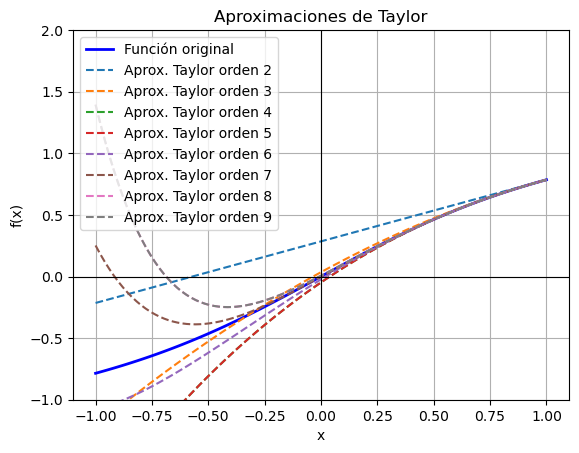

In [43]:
import numpy as np
import math
import sympy as sp
import matplotlib.pyplot as plt

x = sp.Symbol('x')
f = sp.atan(x)

def rec_derivada(f, n):
    if n == 0:
        return f
    else:
        return sp.diff(rec_derivada(f, n - 1), x)

def taylor_series(f, x, n_terms, x0=1):
    taylor_exp = 0
    for n in range(n_terms):
        deriv = rec_derivada(f, n)
        deriv_x0 = deriv.subs(x, x0)
        taylor_exp += (deriv_x0 / math.factorial(n)) * (x - x0)**n
    return taylor_exp

x_vals = np.linspace(-1, 1, 100)
f_lambdified = sp.lambdify(x, f, 'numpy')
y_vals = f_lambdified(x_vals)

plt.plot(x_vals, y_vals, label="Función original", color="blue", linewidth=2)

print("Fórmulas y Valores Simplificados de las Aproximaciones de Taylor")
for n in range(1, 10):
    taylor_exp = taylor_series(f, x, n)
    taylor_lambdified = sp.lambdify(x, taylor_exp, 'numpy')

    try:
        y_taylor_vals = taylor_lambdified(x_vals)
        if len(y_taylor_vals) == len(x_vals):
            plt.plot(x_vals, y_taylor_vals, linestyle="--", label=f"Aprox. Taylor orden {n}")
    except Exception as e:
        print(f"Error evaluando el polinomio de Taylor de orden {n}")
        continue
        
    print(f"Orden {n}:")
    print(f"  Fórmula: {sp.simplify(taylor_exp)}")

plt.title("Aproximaciones de Taylor")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.legend()
plt.grid(True)
plt.ylim(-1, 2)
plt.show()

Con Lagrange:

Polinomio de Lagrange: 0.992599650729982*x


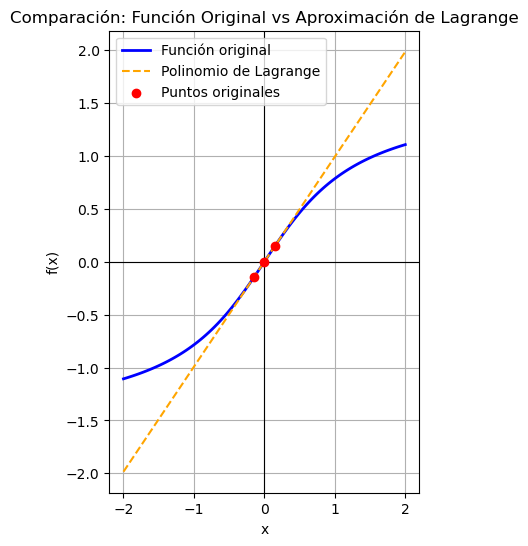

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def lagrange_polynomial(x_points, y_points):
    x = sp.Symbol('x')
    n = len(x_points)
    P = 0
    for k in range(n):
        Lk = 1
        for i in range(n):
            if i != k:
                Lk *= (x - x_points[i]) / (x_points[k] - x_points[i])
        P += y_points[k] * Lk
    return sp.simplify(P)

x_points = [-0.15, 0, 0.15]
y_points = [
    np.arctan(-0.15),
    np.arctan(0),
    np.arctan(0.15)
]

P = lagrange_polynomial(x_points, y_points)
print(f"Polinomio de Lagrange: {P}")

P_lambdified = sp.lambdify(sp.Symbol('x'), P, 'numpy')

f_original_lambdified = np.arctan
x_vals = np.linspace(-2, 2, 100)
y_original = f_original_lambdified(x_vals)
y_lagrange = P_lambdified(x_vals)

plt.figure(figsize=(4, 6))
plt.plot(x_vals, y_original, label="Función original", color="blue", linewidth=2)
plt.plot(x_vals, y_lagrange, label="Polinomio de Lagrange", color="orange", linestyle="--")
plt.scatter(x_points, y_points, color="red", label="Puntos originales", zorder=5)
plt.title("Comparación: Función Original vs Aproximación de Lagrange")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.legend()
plt.grid()
plt.show()